<a href="https://colab.research.google.com/github/martinpius/Behind-Keras-Layers-and-Models/blob/main/AutoEncoders%2C_Saving_and_Loading_Keras_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are in Colab with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\...Load Your Drive Please...")

Mounted at /content/drive
You are in Colab with tensorflow version: 2.4.0


In [4]:
def time_fmt(t):
  h = int(t / (60 * 60))
  m = int(t % (60 * 60) / 60)
  s = int(t % 60)
  return f"{h}: {m:>02}: {s:>05.2f}"

time_fmt(124.293809)

'0: 02: 04.00'

In [2]:
import tensorflow as tf
import numpy as np
import time

In [6]:
#We build an auto-encoder's model for cifar10 data.
inputs = tf.keras.Input(shape = (32,32,3), name = 'img-dim')
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu')(inputs)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size = 2)(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3), padding = 'valid')(x)
x = tf.keras.layers.MaxPooling2D(pool_size = 2)(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
enc_out = tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation= 'relu', padding = 'valid')(x)

x = tf.keras.layers.Reshape((8,8,1))(enc_out)
x = tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
x = tf.keras.layers.Conv2DTranspose(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
x = tf.keras.layers.UpSampling2D(size = (2,2))(x)
x = tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
x = tf.keras.layers.Conv2DTranspose(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
x = tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
dec_out = tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), name = 'dec_out')(x)

model = tf.keras.Model(inputs = inputs, outputs =  dec_out, name = 'autoencoder')




In [7]:
model.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img-dim (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          

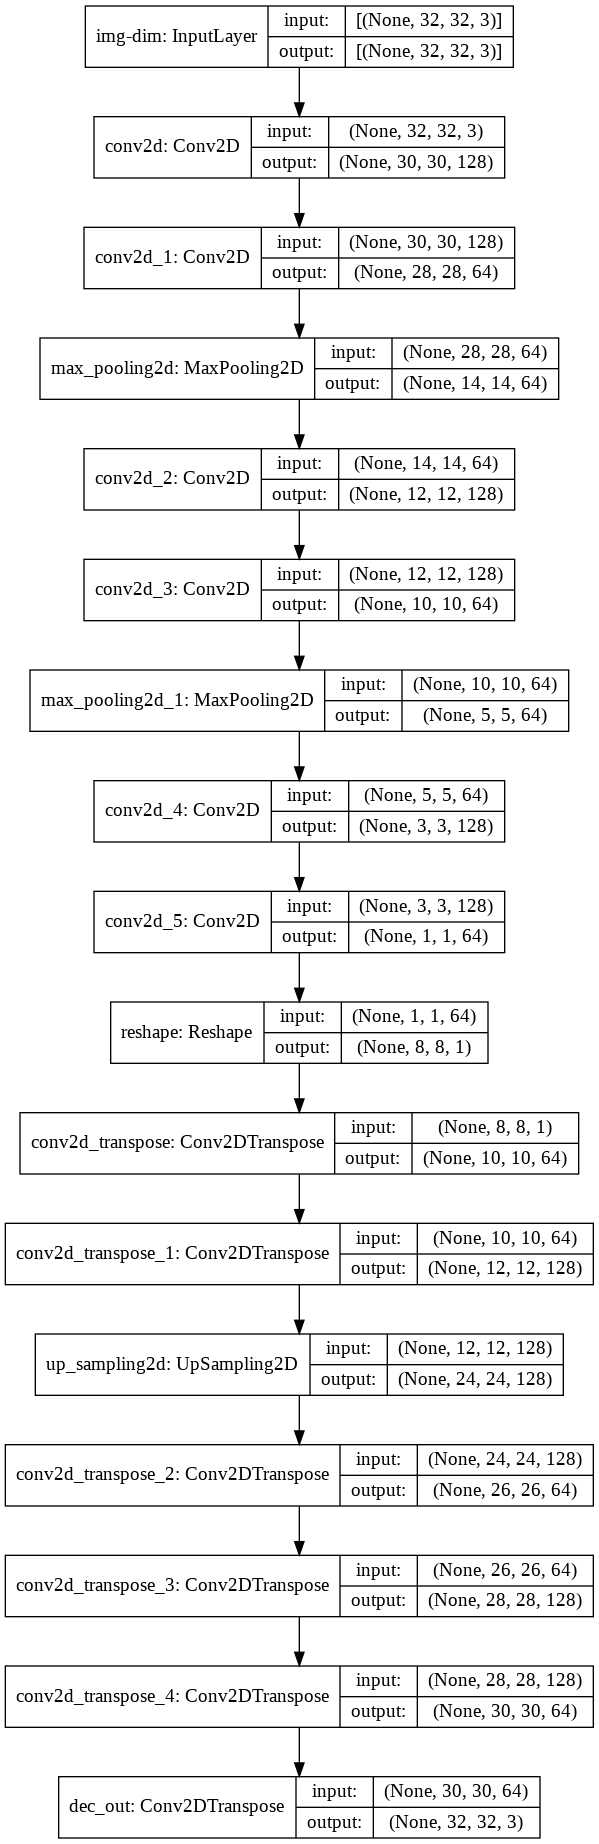

In [8]:
tf.keras.utils.plot_model(model = model, to_file = 'autoencoder.png', show_shapes = True)

In [9]:
(x_train, _),(_, _) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [10]:
display(x_train.shape)

(50000, 32, 32, 3)

In [11]:
x_train = x_train.astype('float32')/255

In [12]:
train_dfm = tf.data.Dataset.from_tensor_slices(x_train)

In [13]:
train_dfm = train_dfm.shuffle(buffer_size = 1024).batch(64)

In [14]:
#The training loop

In [15]:
epochs = 10

In [16]:
lossfn = tf.keras.losses.MeanSquaredError()
metricfn = tf.keras.metrics.Mean()
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)


In [17]:
start_time = time.time()
for epoch in range(epochs):
  print(f"The begining of epoch: {epoch}")
  for step, x_train_batch in enumerate(train_dfm):
    with tf.GradientTape() as tape:
      dec_out = model(x_train_batch)
      loss = lossfn(x_train_batch, dec_out)
      loss+=loss
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    metricfn(loss)
    if step % 100 == 0:
      print("step %d: mean loss = %.4f" % (step, metricfn.result()))
  
end_time = time.time()

The begining of epoch: 0
step 0: mean loss = 0.6056
step 100: mean loss = 0.1572
step 200: mean loss = 0.1126
step 300: mean loss = 0.0932
step 400: mean loss = 0.0828
step 500: mean loss = 0.0753
step 600: mean loss = 0.0698
step 700: mean loss = 0.0656
The begining of epoch: 1
step 0: mean loss = 0.0631
step 100: mean loss = 0.0604
step 200: mean loss = 0.0581
step 300: mean loss = 0.0561
step 400: mean loss = 0.0544
step 500: mean loss = 0.0530
step 600: mean loss = 0.0517
step 700: mean loss = 0.0506
The begining of epoch: 2
step 0: mean loss = 0.0497
step 100: mean loss = 0.0487
step 200: mean loss = 0.0479
step 300: mean loss = 0.0472
step 400: mean loss = 0.0465
step 500: mean loss = 0.0458
step 600: mean loss = 0.0452
step 700: mean loss = 0.0447
The begining of epoch: 3
step 0: mean loss = 0.0442
step 100: mean loss = 0.0437
step 200: mean loss = 0.0432
step 300: mean loss = 0.0427
step 400: mean loss = 0.0423
step 500: mean loss = 0.0419
step 600: mean loss = 0.0415
step 700:

In [18]:
print(f"time_elapse:{time_fmt(start_time - end_time)}")

time_elapse:0: 55: 29.00


In [19]:
#Saving and loading the model

In [20]:
model.save('autoencoder')

INFO:tensorflow:Assets written to: autoencoder/assets


In [21]:
#We can load back the model as follow:
autoencoder_reloaded = tf.keras.models.load_model('autoencoder')

In [22]:
autoencoder_reloaded.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img-dim (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          

In [23]:
#Get the model configuration
auto_config = autoencoder_reloaded.get_config()

In [26]:
auto_config.values #This is a detailed dictionary of the model's configuration

<function dict.values>

In [28]:
#We can use the above configuration to re-create the same model
new_autoencoder = tf.keras.Model.from_config(auto_config)

In [29]:
new_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img-dim (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          

In [1]:
#Save keras models created through layer's and model's subclassing
#Here we over-write the get_config() and from_config() methods

In [1]:
#We can register our customized kerals models as part of the inbuild

In [3]:
class DenseLayer(tf.keras.layers.Layer):
  def __init__(self, units = 64, name = 'Customized_dense_layer'):
    super(DenseLayer, self).__init__(name = name)
    self.units = units
  
  def build(self, inputs_shape):
    self.w = self.add_weight(shape = (inputs_shape[-1], self.units), initializer = 'random_normal', trainable = True, name = 'weight')
    self.b = self.add_weight(shape = (self.units,), trainable = True, initializer = 'zeros', name = 'bias')
  
  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b
  
  def get_config(self):
    config = super(DenseLayer, self).get_config()
    config.update({'units': self.units})
    return config

    

In [16]:
def my_activation(a):
  act = tf.nn.relu(a)**2
  return act

In [17]:
x = tf.keras.Input(shape = (10,))
dense = DenseLayer(128)
out = dense(x)

In [18]:
outputs = tf.keras.layers.Activation(my_activation)(out)

In [19]:
model = tf.keras.Model(inputs = x, outputs = outputs)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
Customized_dense_layer (Dens (None, 128)               1408      
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
Total params: 1,408
Trainable params: 1,408
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Get the model's configurations
myconfig = model.get_config()

In [22]:
myconfig

{'input_layers': [['input_4', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 10),
    'dtype': 'float32',
    'name': 'input_4',
    'ragged': False,
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_4'},
  {'class_name': 'DenseLayer',
   'config': {'dtype': 'float32',
    'name': 'Customized_dense_layer',
    'trainable': True,
    'units': 128},
   'inbound_nodes': [[['input_4', 0, 0, {}]]],
   'name': 'Customized_dense_layer'},
  {'class_name': 'Activation',
   'config': {'activation': 'my_activation',
    'dtype': 'float32',
    'name': 'activation_2',
    'trainable': True},
   'inbound_nodes': [[['Customized_dense_layer', 0, 0, {}]]],
   'name': 'activation_2'}],
 'name': 'model',
 'output_layers': [['activation_2', 0, 0]]}

In [1]:
#Weight transfer's between layers in memory

In [2]:
import tensorflow as tf

In [3]:
def wt_trans():
  layer = tf.keras.layers.Dense(units = 32, kernel_initializer = 'random_normal', activation = 'relu')
  layer.build((10,))
  return layer

In [4]:
layer1 = wt_trans()
layer2 = wt_trans()

In [5]:
layer1.set_weights(layer2.get_weights())#copy layer1's weights into layer2

In [7]:
layer1.weights[0]

<tf.Variable 'kernel:0' shape=(10, 32) dtype=float32, numpy=
array([[-1.80564187e-02,  9.80987996e-02, -4.65300903e-02,
        -3.82264517e-02, -2.45631989e-02, -5.09849191e-02,
         7.76119484e-03,  1.67045966e-02,  2.11789422e-02,
        -5.63174598e-02,  1.06346667e-01, -3.80355343e-02,
        -1.04816565e-02,  2.64813900e-02, -3.15379240e-02,
         2.36817785e-02,  5.95539473e-02, -8.20489153e-02,
        -5.10776043e-02, -2.21742615e-02,  1.02136090e-01,
         1.42987091e-02, -1.10738210e-01, -6.17266778e-05,
         4.53371704e-02, -7.25475419e-03,  2.38637701e-02,
        -2.58406494e-02,  2.20270809e-02,  8.27933848e-02,
         2.57290099e-02,  1.09184481e-01],
       [ 8.39367807e-02, -2.73569506e-02, -5.71526960e-02,
         3.41296718e-02, -2.16250923e-02,  3.02796718e-02,
        -6.60806103e-03, -5.34130298e-02,  7.15756714e-02,
        -7.49688363e-03,  5.70349768e-02,  1.89121914e-04,
         1.89387165e-02,  1.98363066e-02, -4.92539965e-02,
        -2.

In [10]:
#Weights transfer from one model to another in the memory
#Sometimes we might like to transers the weights from one model to the other if we train problems of same domains

In [13]:
#Model1
inputs = tf.keras.Input(shape = (10,), name = 'inputs_1')
x = tf.keras.layers.Dense(units = 32, activation = 'relu', kernel_initializer = 'random_normal')(inputs)
x = tf.keras.layers.Dense(units = 64, kernel_initializer = 'random_normal', activation = 'relu')(x)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax')(x)
model1 = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'model1')

In [36]:
#Model2

class Model2(tf.keras.Model):
  def __init__(self, output_dim, name = 'model2', **kwargs):
    super(Model2, self).__init__(name = None, **kwargs)
    self.output_dim = output_dim
    self.dense1 = tf.keras.layers.Dense(32, activation = 'relu', kernel_initializer= 'random_normal')
    self.dense2 = tf.keras.layers.Dense(64, kernel_initializer = 'random_normal', activation = 'relu')
    self.out = tf.keras.layers.Dense(output_dim, activation = 'softmax')
  
  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    return self.out(x)
  
  def get_config(self):
    config = super(Model2, self).get_config()
    config.update({'output_dim': self.output_dim, 'name':self.name})


In [37]:
model2 = Model2(10)

In [38]:
out = model2(tf.keras.Input(shape = (10,)))

In [39]:
out.shape

TensorShape([None, 10])

In [40]:
#Copy the weights of model2 into model1

In [41]:
model1.set_weights(model2.get_weights())

In [47]:
model1.get_weights()[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [48]:
model2.get_weights()[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)